In [106]:
from pathlib import Path
import pandas as pd
import numpy as np
import glob as gb

In [118]:
PERF_DIR = Path('/media/DataExt4/Software/Others/OS-build-csharp/results/')

In [119]:
csvs = gb.glob(str(PERF_DIR / '*.csv'))

In [120]:
csv = csvs[0]

In [121]:
csvs

['/media/DataExt4/Software/Others/OS-build-csharp/results/new3_Workspace_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/ori_Workspace_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new2_IdfObjectParse_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new_VersionTranslation_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/ori_LoadIdfFile_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new2_Workspace_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/ori2_ForwardTranslator_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new3_IddObjectParse_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new2_LoadIdfFile_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new3_Model_Benchmark.csv',
 '/media/DataExt4/Software/Others/OS-build-csharp/results/new3_Vector_remove_vs_copy_B

In [122]:
def find_skip_rows(results_file: Path) -> int:
    """
    Open the result benchmark, and locate the actual start of the timings

    Returns:
    --------
    skiprows (int): the number of lines to skip when read_csv is called
    """
    skiprows = 0
    with open(results_file, 'r') as f:
        while ('name,iterations,' not in f.readline()):
            skiprows += 1

    return skiprows

In [123]:
def read_bench_results(results_file: Path) -> pd.DataFrame:
    df = pd.read_csv(csv, skiprows=find_skip_rows(csv), index_col=0)
    df = df.loc[df['iterations'].notnull()]
    # Convert everything in ms
    for col in ['real_time', 'cpu_time']:
        df[col] = (df[[col, 'time_unit']].apply(
            lambda row: pd.to_timedelta(arg=row[0], unit=row[1]), axis=1)
                   .dt.total_seconds() * 1e3)
        
    return df

In [124]:
df_dict = {}
dfs = []
for csv in csvs:
    fname = Path(csv).name
    if 'Model_ModelObjects' in fname:
        fname = 'Model_ModelObjects'
    prefix  = Path(csv).name.split('_')[0]
    test = '_'.join(fname.split('_')[1:-1])
    
    df = read_bench_results(csv)
    df['test_file'] = test
    df['prefix'] = prefix
    dfs.append(df)

In [125]:
df = pd.concat(dfs, axis=0)

In [126]:
df.set_index(['prefix', 'test_file'], append=True, inplace=True)

In [127]:
df_real = df['real_time'].unstack('prefix')

In [117]:
df_real.sum()

prefix
new     110114.098999
new2    109422.064125
new3    107787.342070
new4     31422.016868
ori     108635.490008
ori2    108763.969745
dtype: float64

<AxesSubplot:xlabel='name,test_file'>

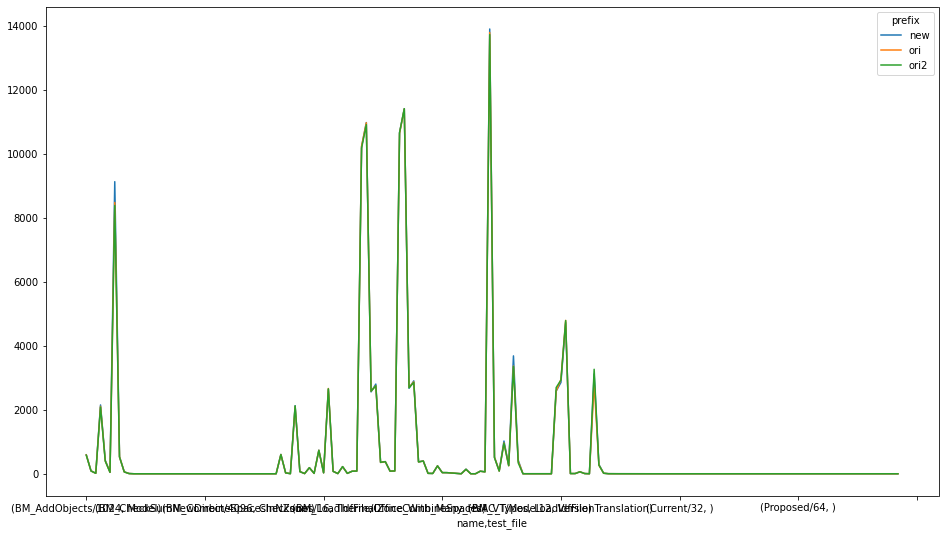

In [85]:
df_real.plot(figsize=(16, 9))

In [86]:
df_real['orim'] = df_real[['ori', 'ori2']].mean(axis=1)
df_real['newm'] = df_real[['new'
                           #, 'new2'
                          ]].mean(axis=1)

<AxesSubplot:ylabel='name,test_file'>

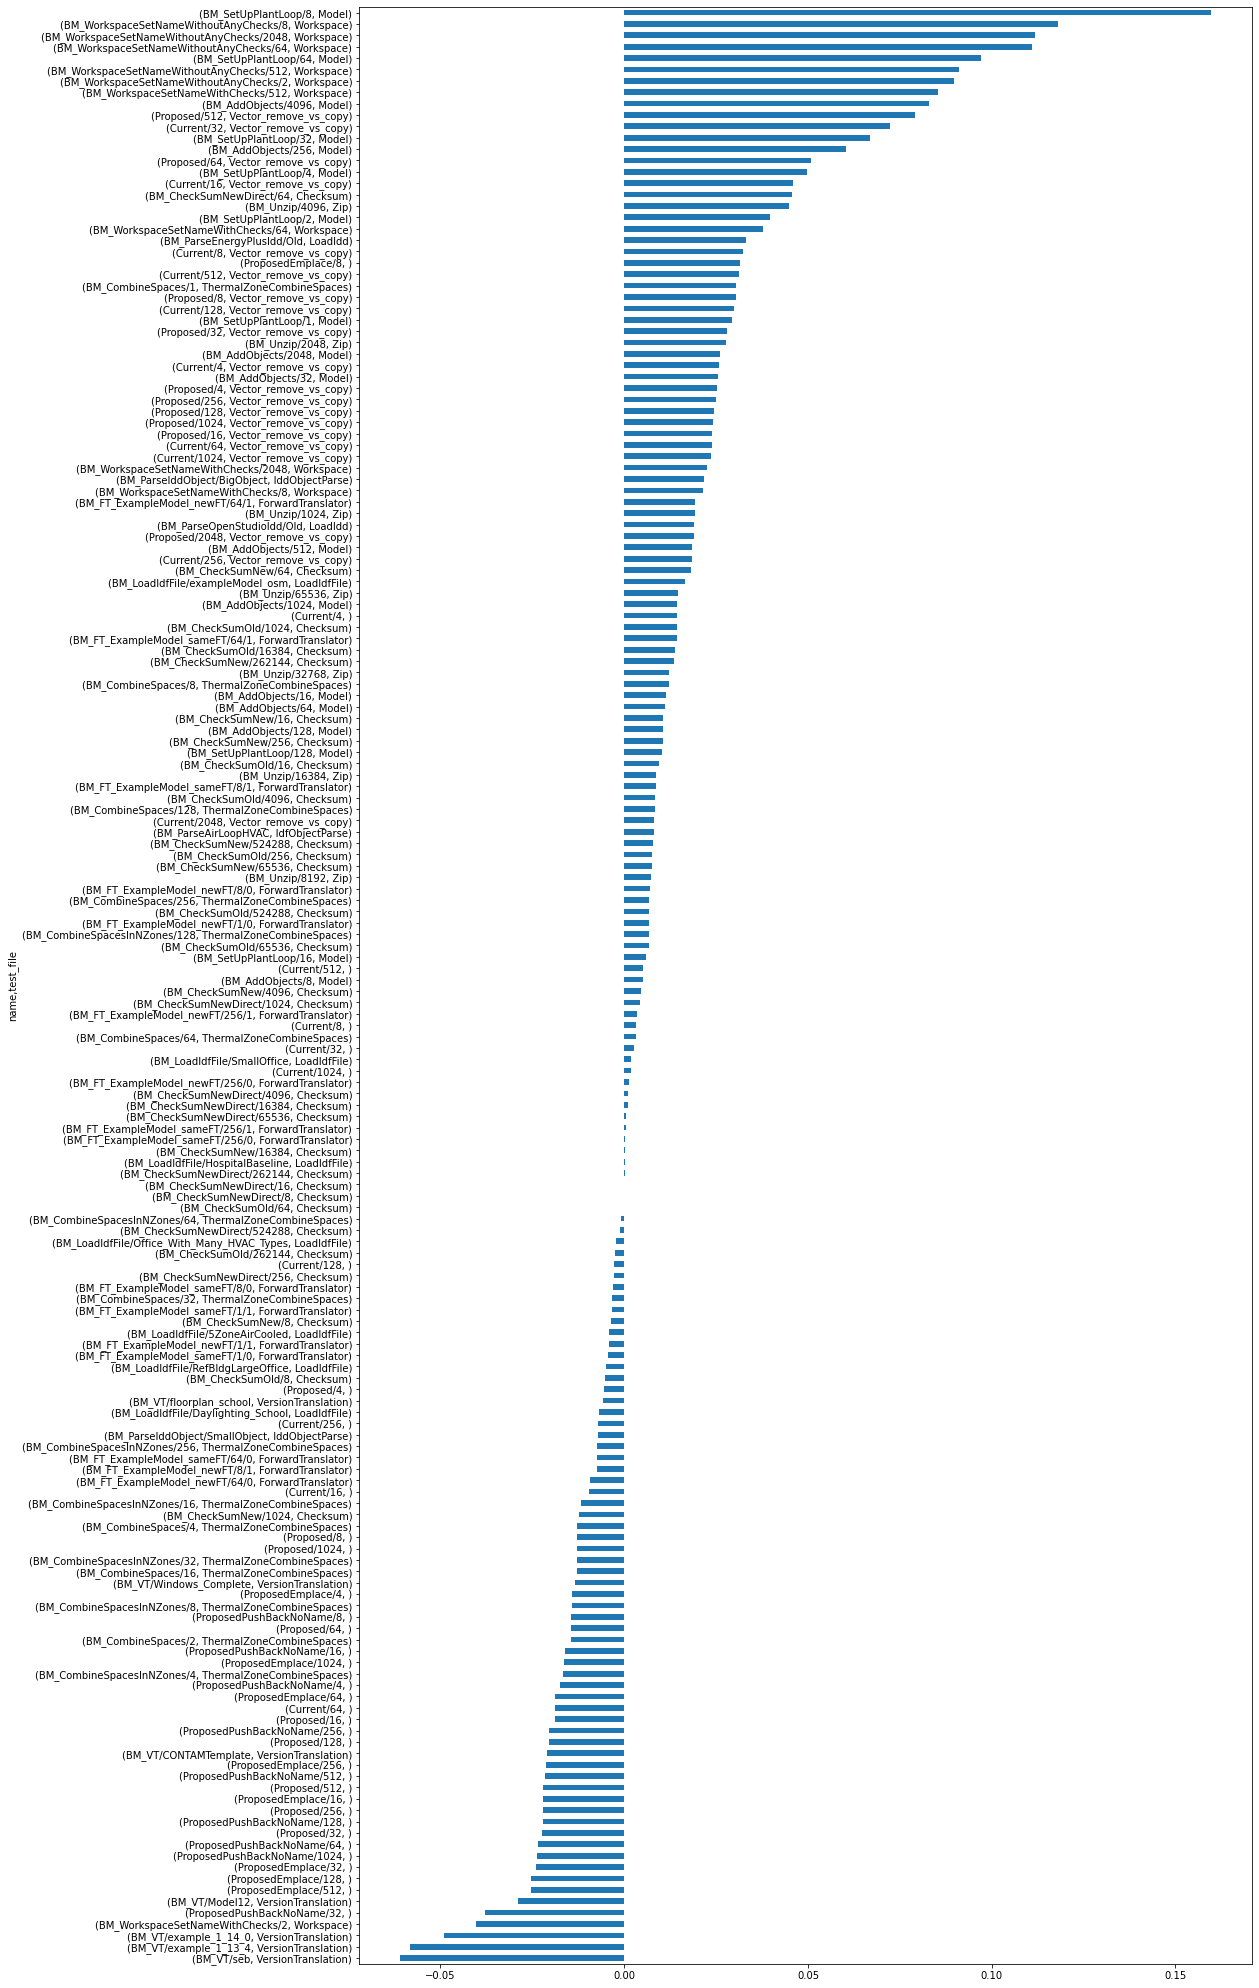

In [94]:
(df_real[['orim', 'newm']]).pct_change(axis=1)['newm'].sort_values().plot(kind='barh', figsize=(16, 36))

<AxesSubplot:ylabel='name,test_file'>

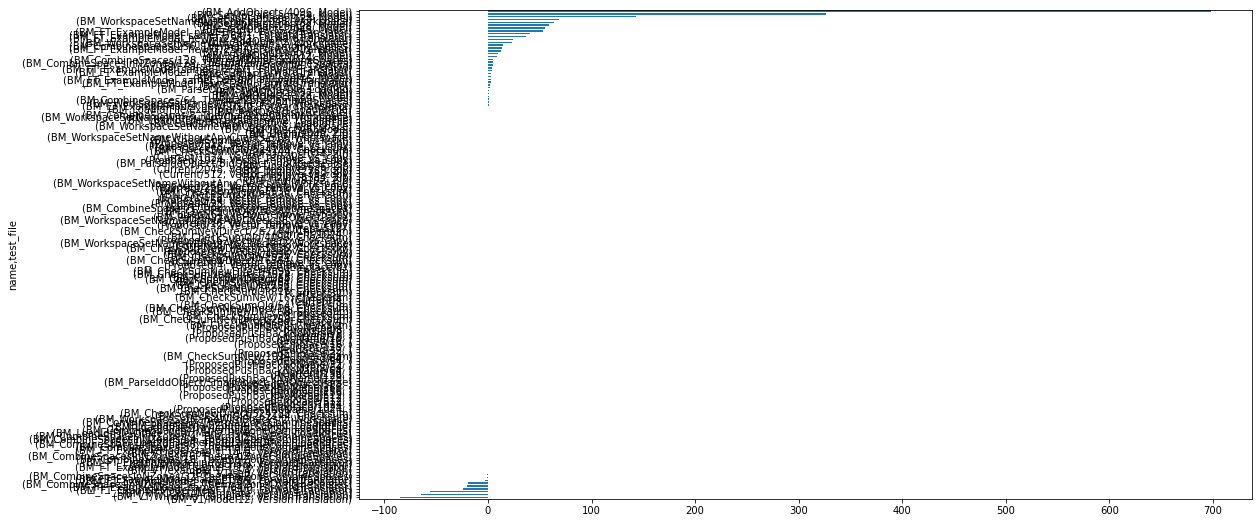

In [89]:
(df_real['newm'] - df_real['orim']).sort_values().plot(kind='barh', figsize=(16, 9))

<AxesSubplot:ylabel='name,test_file'>

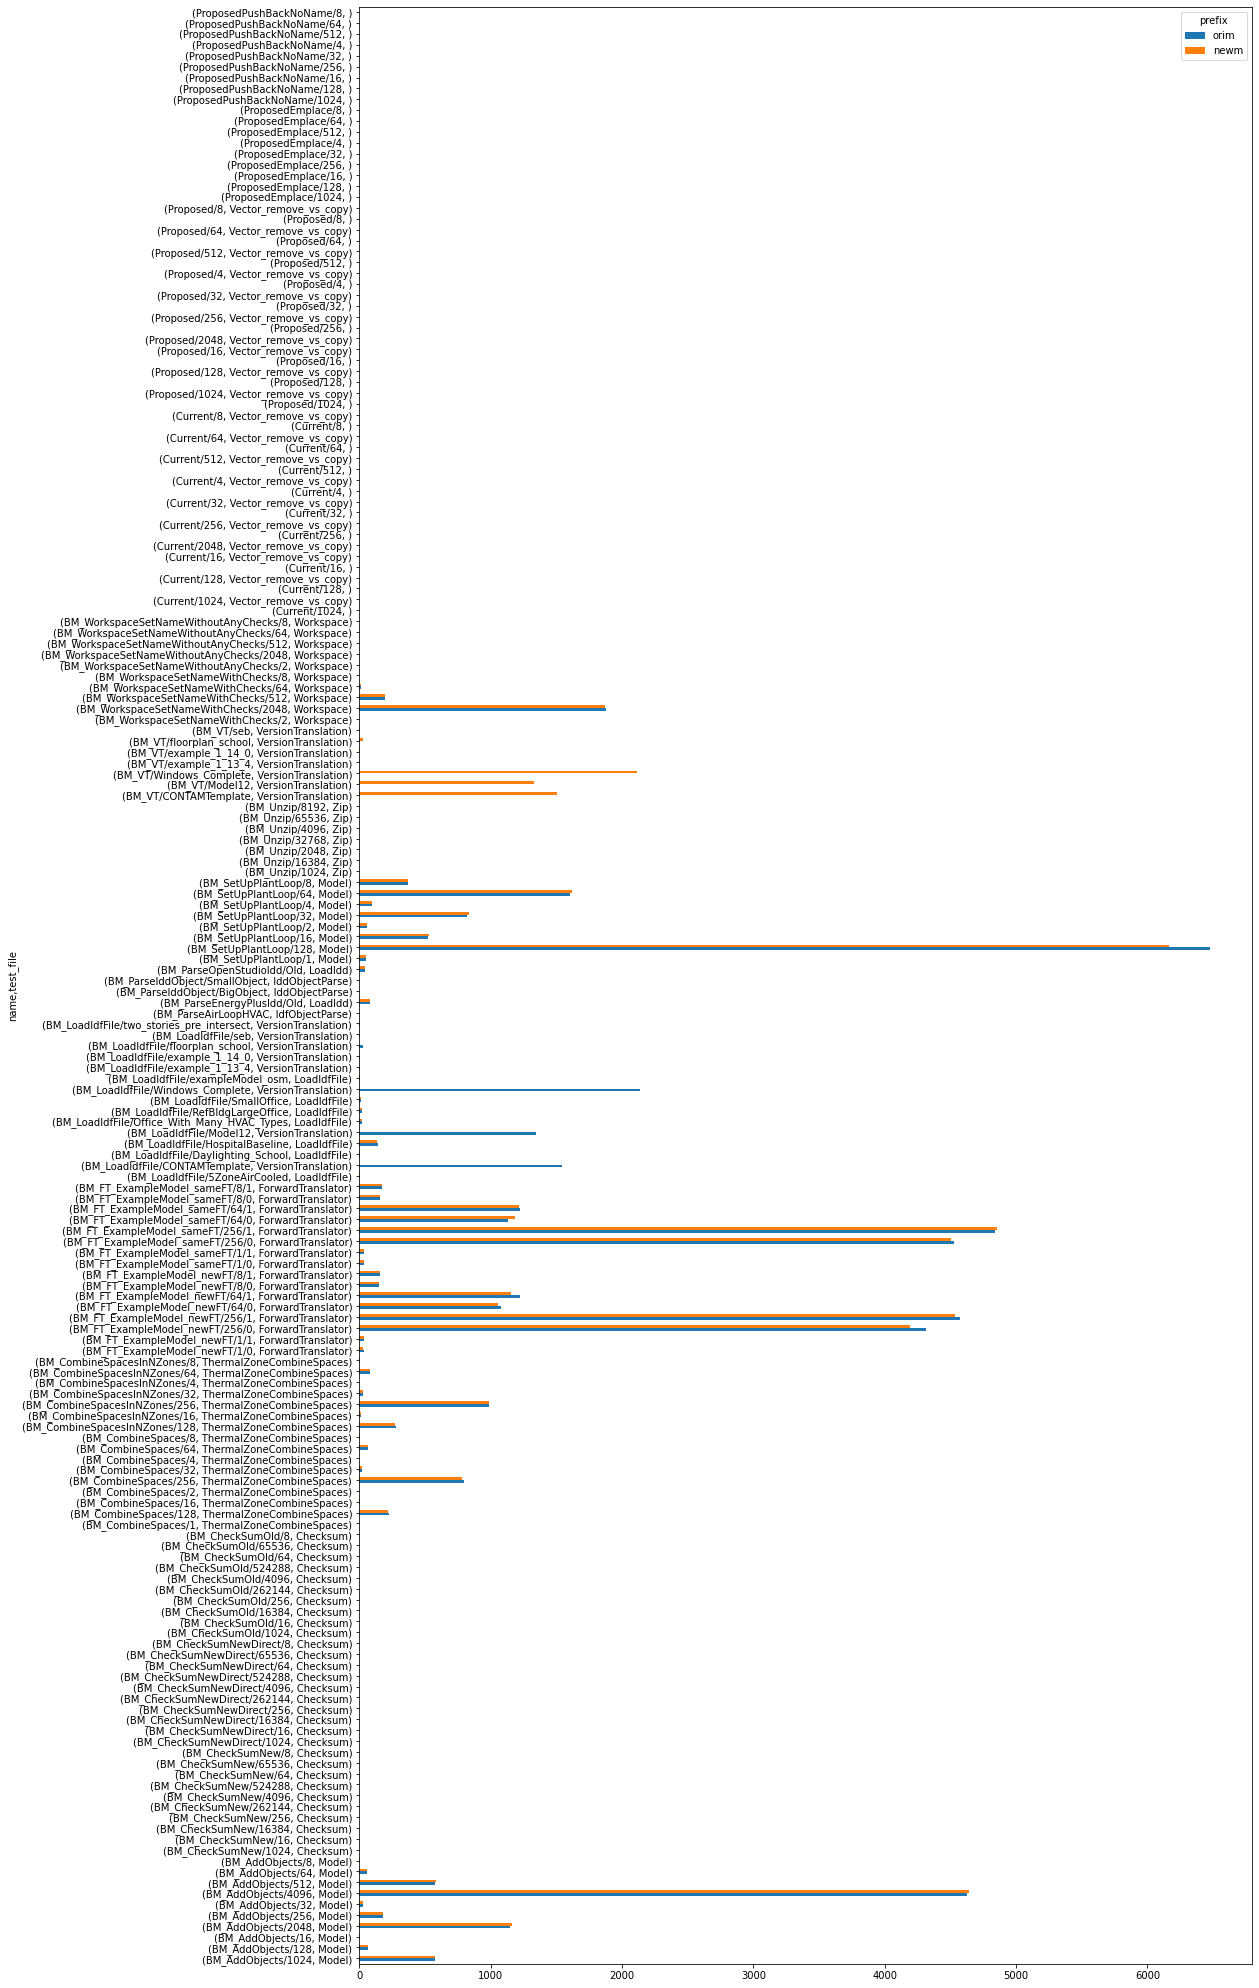

In [65]:
df_real[['orim', 'newm']].plot(kind='barh', figsize=(16, 36))

In [67]:
df_real[['orim', 'newm']].mean()

prefix
orim    294.806758
newm    293.269788
dtype: float64